# Project 4: Heart Disease Prediction (Classification) 🩺

**Project Objective:** To build a machine learning model that can accurately predict whether a patient has heart disease based on a set of medical attributes. This project will serve as a comprehensive introduction to classification, one of the most common types of machine learning problems.


### Core Concepts We'll Cover:
1.  **Classification Fundamentals:** Understanding the goal of predicting a discrete category.
2.  **Exploratory Data Analysis (EDA) for Classification:** Analyzing features to find patterns that distinguish between classes.
3.  **Data Preprocessing:** Preparing data for classification models using encoding and feature scaling.
4.  **Model Building:** Training and comparing a simple baseline model (Logistic Regression) with an advanced ensemble model (Random Forest).
5.  **Model Evaluation:** Mastering key classification metrics like Accuracy, Precision, Recall, F1-Score, and interpreting the Confusion Matrix.
6.  **Feature Importance:** Identifying the most influential medical factors for predicting heart disease.

### **Theoretical Concept: What is Classification?**

Classification is a type of supervised machine learning task where the goal is to predict a **discrete category or class label**. This is different from regression, where we predict a continuous numerical value.

**Classification vs. Regression:**
- **Classification:** Is this email spam or not spam? (Two classes)
- **Regression:** What will be the price of this house? (Continuous value)

In this project, our goal is to predict one of two classes for a patient: `0` (No Heart Disease) or `1` (Has Heart Disease). This is a **binary classification** problem.

### Step 1: Setup - Importing Libraries and Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

sns.set_style('whitegrid')

In [2]:
# Download the dataset using the Kaggle Hub API
print("Downloading dataset...")
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

# Load the dataset from the downloaded path
file_path = f'{path}/heart_disease_uci.csv'
df = pd.read_csv(file_path)

print("Dataset downloaded and loaded successfully.")
print(f"Data shape: {df.shape}")
df.head()

Using Colab cache for faster access to the 'heart-disease-data' dataset.
Dataset downloaded and loaded successfully.
Data shape: (920, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### Step 2: Exploratory Data Analysis (EDA)
Before building any models, we need to understand our data deeply. We'll look at the distribution of our target variable, the characteristics of our features, and how they relate to the presence of heart disease.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [5]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [6]:
df['num'].value_counts()

,count
num,
0,411
1,265
2,109
3,107
4,28


#### 2.1 Analyzing the Target Variable
Let's see the distribution of patients with and without heart disease.

id (Unique id for each patient)

age (Age of the patient in years)

origin (place of study)

sex (Male/Female)

cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])

trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))

chol (serum cholesterol in mg/dl)

fbs (if fasting blood sugar > 120 mg/dl)

restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]

thalach: maximum heart rate achieved

exang: exercise-induced angina (True/ False)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

ca: number of major vessels (0-3) colored by fluoroscopy

thal: [normal; fixed defect; reversible defect]

num: the predicted attribute

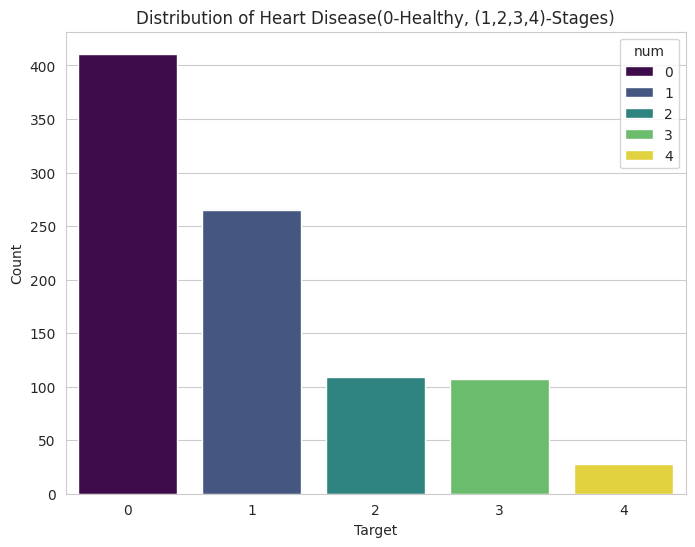

In [7]:
plt.figure(figsize=(8,6))
sns.countplot(x='num',data=df,palette='viridis',hue='num',legend=True)
plt.title('Distribution of Heart Disease(0-Healthy, (1,2,3,4)-Stages)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

**Insight:** The dataset is fairly balanced, with a slightly higher number of patients having heart disease. This is good because it means our model will have a similar number of examples for both classes to learn from, and accuracy will be a meaningful metric.

#### 2.2 Analyzing Features vs. Target

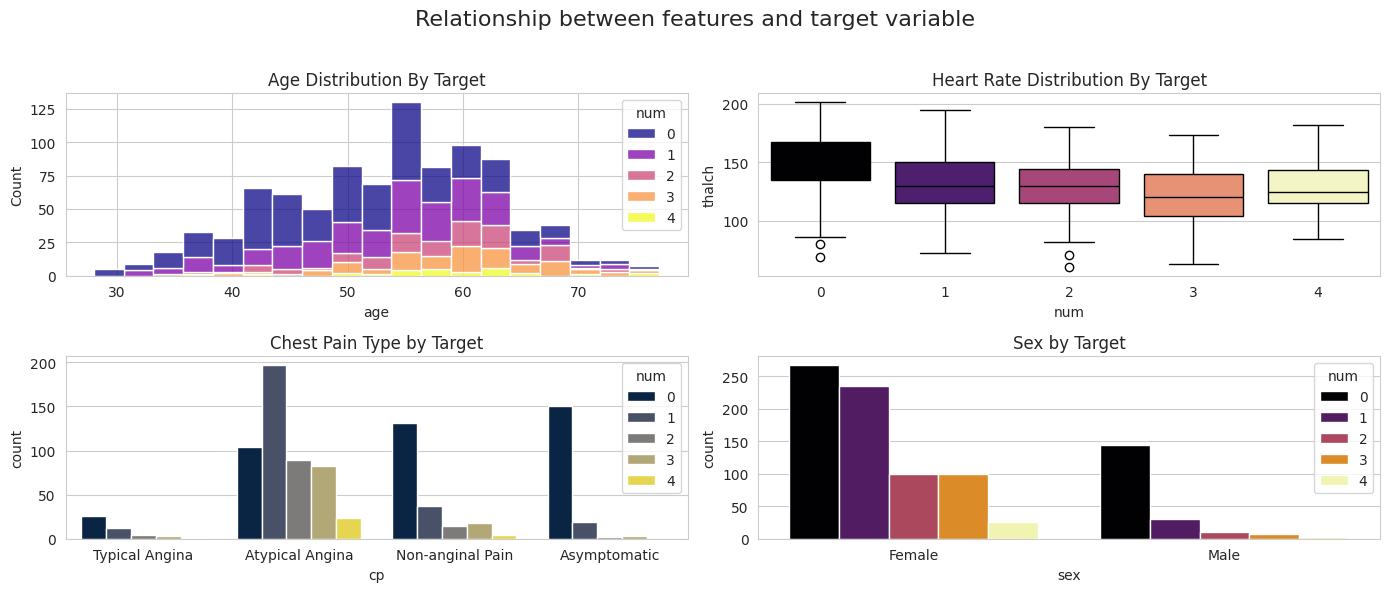

In [8]:
# Let's visualize the relationship between key features and the target
fig,axes=plt.subplots(2,2,figsize=(14,6))
plt.suptitle('Relationship between features and target variable',fontsize=16)

#Age vs num
sns.histplot(ax=axes[0,0],data=df,x='age',hue='num',palette='plasma',multiple='stack').set_title('Age Distribution By Target')
#multiple='stack' stacks histogram bars for different categories, showing both the total distribution and each category’s contribution.

#thaalch(heart rate) vs num
sns.boxplot(ax=axes[0,1],data=df,x='num',y='thalch',palette='magma',hue='num',legend=False).set_title('Heart Rate Distribution By Target')

# Chest Pain Type vs. Target
cp_plot = sns.countplot(ax=axes[1, 0], data=df, x='cp', hue='num', palette='cividis')
cp_plot.set_title('Chest Pain Type by Target')
cp_plot.set_xticks(range(len(df['cp'].unique())))
#df['cp'].unique()---Returns all unique values in the cp column
#len(df['cp'].unique())----Counts how many unique categories exist in cp--Example----len([0, 1, 2, 3]) = 4
#range(4)--Creates a sequence of numbers from 0 to 3
cp_plot.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])

# Sex vs. Target
sex_plot = sns.countplot(ax=axes[1, 1], data=df, x='sex', hue='num', palette='inferno')
sex_plot.set_title('Sex by Target')
sex_plot.set_xticks(range(len(df['sex'].unique())))
sex_plot.set_xticklabels(['Female', 'Male'])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Insights:**
- **Max Heart Rate (`thalach`):** Patients with heart disease tend to have a lower maximum heart rate.
- **Chest Pain (`cp`):** Patients with chest pain types 1 and 2 (Atypical and Non-anginal) are more likely to have heart disease. Surprisingly, those with type 0 (Typical Angina) are less likely, and those with asymptomatic pain (type 3) are very likely to have the disease.
- **Sex:** A higher proportion of females in this dataset have heart disease compared to males.

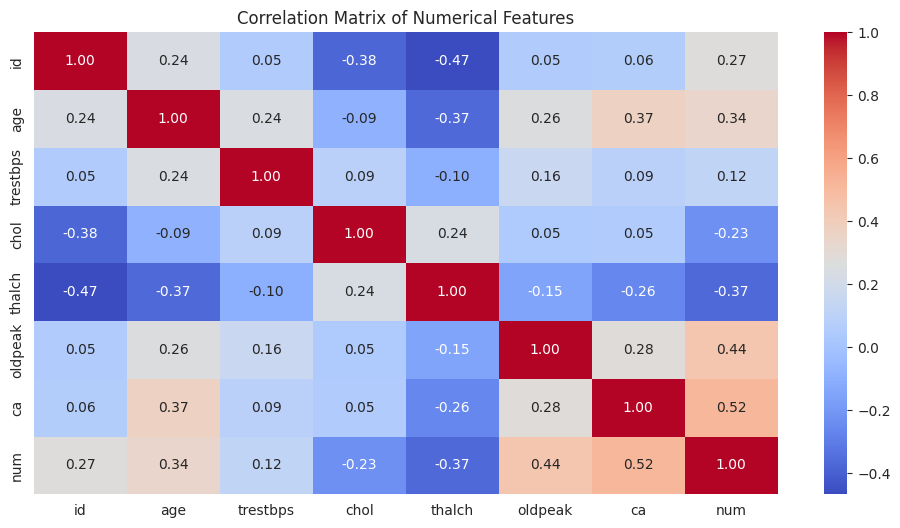

In [9]:
# Correlation Heatmap
plt.figure(figsize=(12, 6))
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Step 3: Data Preprocessing
Even though the data is clean, we need to prepare it for our models. This involves:
1.  **Separating features (X) and target (y).**
2.  **Identifying categorical features** that need to be encoded.
3.  **One-Hot Encoding** categorical features to convert them into a numerical format.
4.  **Scaling numerical features** so they are on a similar scale.

In [10]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [11]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [12]:
#Separating features (X) and target (y).
X=df.drop('num',axis=1)
X=X.drop(['id','dataset'],axis=1)
y=df['num']



In [13]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN
916,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect
918,58,Male,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
y

,num
0,0
1,2
2,1
3,0
4,0
...,...
915,1
916,0
917,2
918,0


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 93.6+ KB


In [16]:
categorical_features=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical_features=['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

In [17]:
#Imputed numerical features null value
for col in numerical_features:
  median_val=X[col].median()
  X[col]=X[col].fillna(median_val)

X[numerical_features].isnull().sum()

,0
age,0
trestbps,0
chol,0
thalch,0
oldpeak,0
ca,0


In [18]:
for col in categorical_features:
  mode_val=X[col].mode()[0]
  X[col]=X[col].fillna(mode_val)

X[categorical_features].isnull().sum()

/tmp/ipython-input-3743594983.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[col]=X[col].fillna(mode_val)


,0
sex,0
cp,0
fbs,0
restecg,0
exang,0
slope,0
thal,0


In [19]:
#Scaling Numerical Features
scaler=StandardScaler()
X[numerical_features]=scaler.fit_transform(X[numerical_features])

#One-Hot Encoding OF Categorical Features
X=pd.get_dummies(X,columns=categorical_features,drop_first=True)

X.head()

,age,trestbps,chol,thalch,oldpeak,ca,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1.007386,0.705176,0.303643,0.489727,1.368109,-0.361400,True,False,False,True,True,False,False,False,False,False,False,False
1,1.432034,1.518569,0.789967,-1.181478,0.611589,4.411152,True,False,False,False,False,False,False,True,True,False,True,False
2,1.432034,-0.650479,0.266939,-0.345875,1.651804,2.820301,True,False,False,False,False,False,False,True,True,False,False,True
3,-1.752828,-0.108217,0.459634,1.961979,2.502889,-0.361400,True,False,True,False,False,True,False,False,False,False,True,False
4,-1.328180,-0.108217,0.037541,1.365120,0.517024,-0.361400,False,True,False,False,False,False,False,False,False,True,True,False


In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
X_train

,age,trestbps,chol,thalch,oldpeak,ca,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
880,0.901224,-0.108217,-0.274440,-0.703991,2.030064,-0.361400,True,False,False,False,False,False,True,True,True,False,True,False
457,0.051927,0.976307,0.211884,-0.624410,-0.806886,-0.361400,True,False,True,False,False,True,False,False,True,False,True,False
797,-0.266559,-0.108217,1.276291,0.091821,-0.334061,-0.361400,True,False,True,False,False,True,False,False,True,False,True,False
25,-0.372721,-0.650479,0.175180,0.808052,0.706154,-0.361400,False,False,True,False,False,True,False,False,True,False,True,False
84,-0.160397,-0.650479,1.147828,1.365120,-0.617756,-0.361400,True,True,False,False,False,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.582737,0.434045,-0.210208,0.967214,-0.806886,1.229451,True,False,False,False,False,True,False,True,False,True,False,True
270,0.795061,0.434045,0.065069,0.012240,0.989849,1.229451,True,False,False,False,False,False,False,True,False,True,False,True
860,2.281330,1.518569,1.010189,-1.022316,1.084414,-0.361400,True,False,False,False,True,True,False,True,False,False,False,True
435,-0.054235,0.434045,0.147653,0.171402,1.084414,-0.361400,False,True,False,False,False,True,False,True,True,False,True,False


### Step 4: Model Building & Training


#### **Theoretical Concept: Classification Models**

Let's dive into more detail on the classification models we are using:

*   **Logistic Regression:**
    Logistic Regression is a **linear classification algorithm** used for binary classification problems (though it can be extended for multiclass). Despite the name "regression," it's a classification method. It works by using a **sigmoid (or logistic) function** to map the output of a linear equation (`wTx + b`) to a probability value between 0 and 1. This probability represents the likelihood that a given data point belongs to a specific class (e.g., the positive class). A threshold (commonly 0.5) is then applied to these probabilities to assign the class label. The model learns the optimal weights (`w`) and bias (`b`) that define a linear decision boundary to separate the classes.

*   **Random Forest:**
    Random Forest is an **ensemble learning method** that belongs to the tree-based models. It builds a large number of **decision trees** during training. Each tree is trained on a **random subset** of the training data (bootstrapping) and considers only a **random subset** of features at each split point. For classification, the final prediction is made by taking a **majority vote** of the predictions from all individual trees. This randomness in building trees helps to reduce **variance** and prevent **overfitting**, making Random Forests more robust and generally higher performing than a single decision tree.

*   **Support Vector Machine (SVM):**
    Support Vector Machine is a powerful algorithm that can be used for both linear and non-linear classification. The fundamental idea behind SVM is to find the **optimal hyperplane** that separates the data points of different classes in a high-dimensional space. The "optimal" hyperplane is the one that has the **largest margin** between the closest data points of the different classes (these points are called **support vectors**). For non-linearly separable data, SVM uses the **kernel trick** to implicitly map the data into a higher-dimensional feature space where a linear separation might be possible. Common kernels include the linear kernel, polynomial kernel, and Radial Basis Function (RBF) kernel.

*   **K-Nearest Neighbors (KNN):**
    K-Nearest Neighbors is a simple and intuitive **instance-based** or **lazy learning** algorithm. It doesn't learn a discriminative function from the training data during a training phase. Instead, it memorizes the training dataset. To classify a new, unseen data point, it calculates the **distance** (e.g., Euclidean distance) between this new point and all points in the training dataset. It then identifies the **'k' nearest data points**. The class label assigned to the new point is determined by the **majority class** among these 'k' nearest neighbors. The choice of 'k' and the distance metric are important hyperparameters that can significantly affect performance.

#### 4.1 Model 1: Logistic Regression (Baseline)

In [22]:
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)
y_pred_lr_model=lr_model.predict(X_test)

In [23]:
y_pred_lr_model

array([0, 0, 1, 2, 0, 0, 0, 3, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 1, 0, 0,
       3, 1, 2, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0,
       1, 1, 1, 4, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 3, 1, 0, 0, 3, 2, 0, 1,
       0, 0, 1, 0, 3, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 3, 1, 1,
       1, 3, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 2, 3, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 3, 1, 1, 1, 0, 1, 3, 1, 0, 1, 1, 1, 3, 0,
       0, 0, 1, 2, 1, 0, 1, 1, 1, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 2, 0, 0, 1])

#### 4.2 Model 2: Random Forest Classifier (Advanced)

In [24]:
rf_model=RandomForestClassifier(n_estimators=10000,random_state=42)
rf_model.fit(X_train,y_train)
y_pred_rf_model=rf_model.predict(X_test)

In [25]:
y_pred_rf_model

array([0, 0, 1, 1, 0, 0, 0, 3, 2, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 3, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 1, 2, 3, 0, 2, 0,
       0, 1, 1, 0, 1, 0, 2, 0, 0, 1, 0, 3, 3, 0, 1, 1, 0, 0, 1, 3, 0, 0,
       0, 0, 1, 3, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 3,
       1, 3, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0,
       1, 2, 3, 0, 0, 0, 2, 0, 1, 0, 0, 3, 0, 1, 3, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 3, 0, 2, 1, 0, 3, 0, 1, 3, 1, 0, 0, 1, 1, 3, 0,
       0, 0, 0, 1, 1, 0, 3, 3, 1, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 4, 0, 0, 1])

#### 4.3 Model 3: Support Vector Machine (SVM)

In [26]:
svm_model=SVC()
svm_model.fit(X_train,y_train)
y_pred_svm_model=svm_model.predict(X_test)

In [27]:
y_pred_svm_model

array([0, 0, 1, 1, 1, 0, 0, 3, 2, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       3, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 3, 1, 0, 0, 1, 1, 0, 3,
       0, 0, 1, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 3,
       1, 3, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 2, 0,
       0, 2, 2, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 3, 0, 2, 1, 0, 1, 0, 1, 3, 1, 0, 2, 1, 1, 2, 0,
       0, 0, 0, 3, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 2, 0, 0, 1])

#### 4.4 Model 4: K-Nearest Neighbors (KNN)

In [28]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn_model = knn_model.predict(X_test)

In [29]:
y_pred_knn_model

array([0, 0, 1, 1, 1, 0, 0, 3, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 3, 1, 0, 0,
       3, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 3, 0, 1, 0,
       0, 0, 1, 3, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 2, 3, 0, 3,
       0, 0, 1, 3, 1, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 3,
       1, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0,
       0, 2, 4, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 1, 0, 3, 2, 2, 1, 0, 2, 0, 1, 3, 1, 0, 1, 1, 1, 3, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 2, 0, 1, 1])

### Step 5: Model Evaluation

#### **Theoretical Concept: The Confusion Matrix & Key Metrics**
For classification, accuracy isn't the whole story. We use a **Confusion Matrix** to get a deeper look at performance.

- **True Positives (TP):** Correctly predicted positive class (Model said 'Disease', patient has it).
- **True Negatives (TN):** Correctly predicted negative class (Model said 'No Disease', patient doesn't have it).
- **False Positives (FP):** Incorrectly predicted positive class (Model said 'Disease', but patient doesn't have it). Also called a **Type I Error**.
- **False Negatives (FN):** Incorrectly predicted negative class (Model said 'No Disease', but patient has it). Also called a **Type II Error**. This is often the most dangerous type of error in medical diagnoses.



From this, we derive key metrics:
- **Accuracy:** (TP+TN) / Total. Overall, how often is the classifier correct?
- **Precision:** TP / (TP+FP). Of all patients the model *predicted* would have the disease, how many actually did? (Measures the cost of FPs).
- **Recall (Sensitivity):** TP / (TP+FN). Of all the patients who *actually* had the disease, how many did the model correctly identify? (Measures the cost of FNs).
- **F1-Score:** The harmonic mean of Precision and Recall. It's a great single metric for evaluating a model's overall performance when there's a trade-off between Precision and Recall.

In [30]:
from sklearn.metrics import classification_report

print("--- Logistic Regression Performance ---")
print(classification_report(y_test, y_pred_lr_model, zero_division=0))

print("\n--- Random Forest Performance ---")
print(classification_report(y_test, y_pred_rf_model, zero_division=0))

print("\n--- Support Vector Machine (SVM) Performance ---")
print(classification_report(y_test, y_pred_svm_model, zero_division=0))

print("\n--- K-Nearest Neighbors (KNN) Performance ---")
print(classification_report(y_test, y_pred_knn_model, zero_division=0))

--- Logistic Regression Performance ---
              precision    recall  f1-score   support

           0       0.68      0.85      0.76        75
           1       0.44      0.54      0.48        54
           2       0.20      0.08      0.11        25
           3       0.31      0.15      0.21        26
           4       0.00      0.00      0.00         4

    accuracy                           0.54       184
   macro avg       0.33      0.32      0.31       184
weighted avg       0.48      0.54      0.50       184


--- Random Forest Performance ---
              precision    recall  f1-score   support

           0       0.71      0.93      0.81        75
           1       0.49      0.50      0.50        54
           2       0.30      0.12      0.17        25
           3       0.25      0.19      0.22        26
           4       0.00      0.00      0.00         4

    accuracy                           0.57       184
   macro avg       0.35      0.35      0.34       184
we

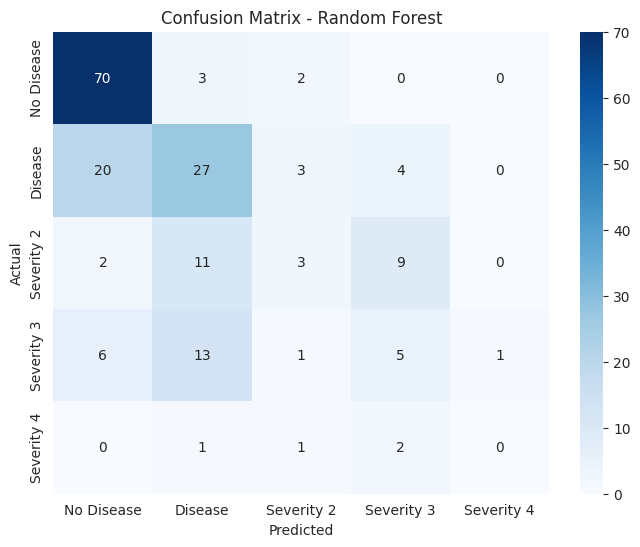

In [31]:
# Visualize the confusion matrix for the best model (Random Forest)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf_model)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease', 'Severity 2', 'Severity 3', 'Severity 4'], yticklabels=['No Disease', 'Disease', 'Severity 2', 'Severity 3', 'Severity 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

### Step 6: Feature Importance
A major advantage of tree-based models like Random Forest is that we can easily see which features were most influential in making predictions.

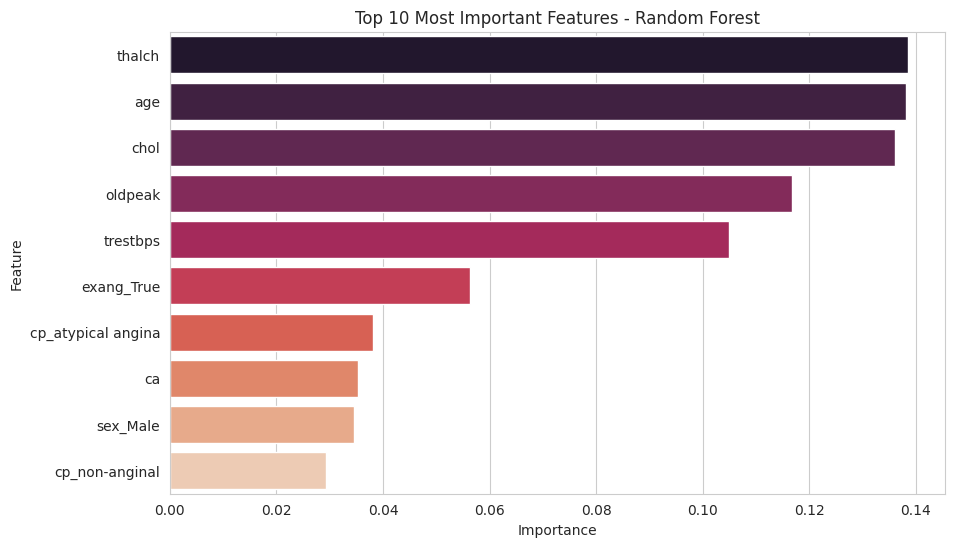

In [32]:
# Get feature names from the training data after preprocessing
feature_names = X_train.columns

# Get feature importances from the trained Random Forest model
importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='rocket', hue='Feature', legend=False)
plt.title('Top 10 Most Important Features - Random Forest')
plt.show()